In [ ]:
# https://chatbotslife.com/cnn-image-classification-using-cifar-10-dataset-on-google-colab-tpu-750da8cd8510
# https://github.com/santanu13/CIFAR_10_Classification_TPU/blob/master/CIFAR_10_CLASSIFICATION_TPU.ipynb

In [1]:
#Import libraries

import os
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedShuffleSplit

#Download dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
print(x_train.shape)

170508288/170498071 [==============================] - 11s 0us/step
(50000, 32, 32, 3)


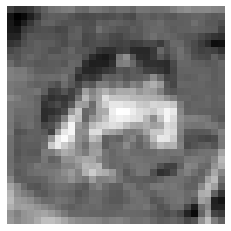

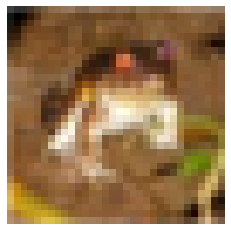

In [6]:
#此處將數據轉換成灰階樣本
from skimage import color
import matplotlib.pyplot as plt
sample = color.rgb2gray(x_train[0])
plt.imshow(sample, cmap='gray')
plt.axis('off')
plt.show()
plt.imshow(x_train[0])
plt.axis('off')
plt.show()

In [7]:
# 產生標籤
name2num = {'airplane' : 0,
            'automobile' : 1,
            'bird' : 2,
            'cat' : 3,
            'deer' : 4,
            'dog' : 5,
            'frog' : 6,
            'horse' : 7,
            'ship' : 8,
            'truck' : 9}
num2name = dict([(v,k) for (k,v) in name2num.items()])
num2name

{0: 'airplane',
 1: 'automobile',
 2: 'bird',
 3: 'cat',
 4: 'deer',
 5: 'dog',
 6: 'frog',
 7: 'horse',
 8: 'ship',
 9: 'truck'}

In [16]:
###################################################
#(x_train, y_train), (x_test, y_test) 變數要重複使用
# x_train x_test 要改變
# y_train y_test 不用變
###################################################
from skimage import color
x_train_gray = np.array([color.rgb2gray(x) for x in x_train])  # <--核心價值 change me
x_test_gray = np.array([color.rgb2gray(x) for x  in x_test ])  # <--核心價值 change me
x_train = x_train_gray
del x_train_gray
x_test = x_test_gray
del x_test_gray
print('Preprocessed by skimage.color.rgb2gray')

Preprocessed by skimage.color.rgb2gray


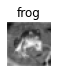

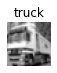

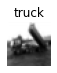

In [18]:
# 檢查樣本
import matplotlib.pyplot as plt
for i in range(3):
    plt.figure(figsize=(0.8, 0.8))
    plt.title(num2name.get(y_train[i][0]))
    plt.imshow(x_train[i], cmap='gray')
    plt.axis('off')
    plt.show()

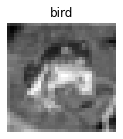

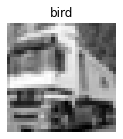

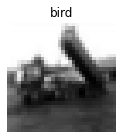

In [19]:
# 請幫忙顯示十張truck
# x_train, y_train
# 'truck' : 9
model = 2
x_train_truck = x_train[y_train.flatten()==model]

import matplotlib.pyplot as plt
for i in range(3):
    plt.figure(figsize=(2, 2))
    plt.title(num2name.get(model))
    plt.imshow(x_train[i], cmap='gray')
    plt.axis('off')
    plt.show()

In [20]:
# 檢視是否需要將數據進行處理 /255.0
x_train[0].min(), x_train[0].max()

(0.0, 0.9878858823529413)

In [25]:
%%time
# 放大
from skimage.transform import rescale
downscale = 64/32
x_train_skimage = np.array([rescale(x, downscale, anti_aliasing=True, multichannel=False) for x in x_train[:]]) # <--核心價值 change me
x_test_skimage = np.array( [rescale(x, downscale, anti_aliasing=True, multichannel=False) for x in x_test[:]])   # <--核心價值 change me
print('Preprocessed by skimage.rescale')

Preprocessed by skimage.rescale
CPU times: user 1min 44s, sys: 1min 29s, total: 3min 14s
Wall time: 1min 44s


In [27]:
%who

StratifiedShuffleSplit	 color	 downscale	 i	 model	 name2num	 np	 num2name	 os	 
pd	 plt	 rescale	 sample	 tf	 x_test	 x_test_skimage	 x_train	 x_train_skimage	 
x_train_truck	 y_test	 y_train	 


In [ ]:
# del x_train	 
# del x_train_truck	
# del x_test	
# del x_train_skimage 
# del x_test_skimage 

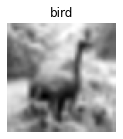

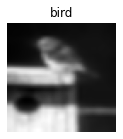

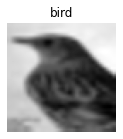

In [28]:
# 請幫忙顯示十張truck
# x_train, y_train
# 'truck' : 9
model = 2
x_train_truck = x_train_skimage[y_train.flatten()==model]

import matplotlib.pyplot as plt
for i in range(3):
    plt.figure(figsize=(2, 2))
    plt.title(num2name.get(model))
    plt.imshow(x_train_truck[i], cmap='gray')
    plt.axis('off')
    plt.show()

In [29]:
x_train_skimage.shape

(50000, 64, 64)

In [30]:
import numpy as np  
import keras
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.utils import np_utils  # 用來後續將 label 標籤轉為 one-hot-encoding  

y_TrainOneHot = np_utils.to_categorical(y_train) 
y_TestOneHot = np_utils.to_categorical(y_test) 
x_Test_norm = x_test_skimage.reshape(x_test_skimage.shape[0], 64*64*1).astype('float32') # /255.0
del x_test_skimage
x_Train_norm = x_train_skimage.reshape(x_train_skimage.shape[0], 64*64*1).astype('float32')   #/255.0
del x_train_skimage

In [ ]:
# y_TrainOneHot = np_utils.to_categorical(y_train) 
# y_TestOneHot = np_utils.to_categorical(y_test) 

# # 將 training 的 input 資料轉為2維
# x_train = x_train_skimage #<--------------preprocessed by skimage
# x_test  = x_test_skimage  #<--------------preprocessed by skimage

# X_train_2D = x_train.reshape(x_train.shape[0], 64*64*3).astype('float32')  
# X_test_2D = x_test.reshape(x_test.shape[0], 64*64*3).astype('float32')    
# x_Train_norm = X_train_2D /255.0  #<------
# x_Test_norm = X_test_2D   /255.0  #<------

In [31]:
# 建置model 
# 導入函式庫
import numpy as np  
import keras
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.utils import np_utils  # 用來後續將 label 標籤轉為 one-hot-encoding  

# 建立簡單的線性執行的模型
model = keras.models.Sequential()
# Add Input layer, 隱藏層(hidden layer) 有 256個輸出變數
model.add(Dense(units=128, input_dim=64*64*1, kernel_initializer='normal', activation='relu')) 
# Add output layer
model.add(Dense(units=10, kernel_initializer='normal', activation='softmax'))

# 編譯: 選擇損失函數、優化方法及成效衡量方式
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               524416    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 525,706
Trainable params: 525,706
Non-trainable params: 0
_________________________________________________________________


In [32]:
# 進行訓練, 訓練過程會存在 train_history 變數中
train_history = model.fit(x=x_Train_norm, y=y_TrainOneHot, 
                          validation_split=0.2, epochs=10, 
                          batch_size=100, verbose=2)  

Epoch 1/10
400/400 - 5s - loss: 2.0784 - accuracy: 0.2461 - val_loss: 2.0048 - val_accuracy: 0.2677 - 5s/epoch - 13ms/step
Epoch 2/10
400/400 - 4s - loss: 1.9563 - accuracy: 0.2986 - val_loss: 1.9574 - val_accuracy: 0.2977 - 4s/epoch - 11ms/step
Epoch 3/10
400/400 - 4s - loss: 1.9165 - accuracy: 0.3133 - val_loss: 1.8886 - val_accuracy: 0.3325 - 4s/epoch - 11ms/step
Epoch 4/10
400/400 - 4s - loss: 1.8849 - accuracy: 0.3278 - val_loss: 1.9011 - val_accuracy: 0.3172 - 4s/epoch - 11ms/step
Epoch 5/10
400/400 - 4s - loss: 1.8582 - accuracy: 0.3410 - val_loss: 1.8608 - val_accuracy: 0.3446 - 4s/epoch - 11ms/step
Epoch 6/10
400/400 - 5s - loss: 1.8360 - accuracy: 0.3487 - val_loss: 1.8494 - val_accuracy: 0.3377 - 5s/epoch - 13ms/step
Epoch 7/10
400/400 - 4s - loss: 1.8165 - accuracy: 0.3546 - val_loss: 1.8500 - val_accuracy: 0.3397 - 4s/epoch - 11ms/step
Epoch 8/10
400/400 - 4s - loss: 1.8073 - accuracy: 0.3600 - val_loss: 1.8185 - val_accuracy: 0.3578 - 4s/epoch - 11ms/step
Epoch 9/10
400/4

In [33]:
# 顯示訓練成果(分數)
scores = model.evaluate(x_Test_norm, y_TestOneHot)  
print()  
print("\t[Info] Accuracy of testing data = {:2.1f}%".format(scores[1]*100.0))  

313/313 [==============================] - 1s 4ms/step - loss: 1.7952 - accuracy: 0.3654

	[Info] Accuracy of testing data = 36.5%


In [34]:
# 顯示訓練成果(分數)
scores = model.evaluate(x_Train_norm, y_TrainOneHot)  
print()  
print("\t[Info] Accuracy of training data = {:2.1f}%".format(scores[1]*100.0))

1563/1563 [==============================] - 7s 4ms/step - loss: 1.7675 - accuracy: 0.3765

	[Info] Accuracy of training data = 37.7%


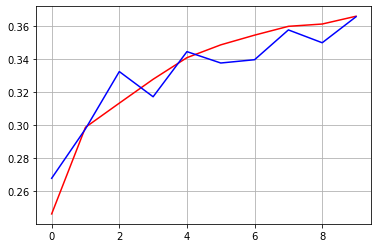

In [35]:
%matplotlib inline
# accuracy chart
import matplotlib.pyplot as plt
plt.plot(train_history.history['accuracy'], color='red')
plt.plot(train_history.history['val_accuracy'], color='blue')
plt.grid()
plt.show()

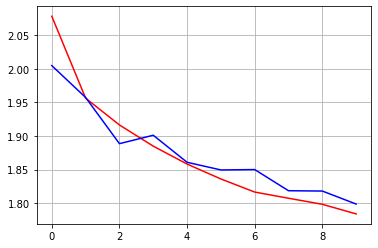

In [36]:
%matplotlib inline
# loss chart
import matplotlib.pyplot as plt
plt.plot(train_history.history['loss'], color='red')
plt.plot(train_history.history['val_loss'], color='blue')
plt.grid()
plt.show()